In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
plt.style.use(style='seaborn')
import nsepy
import logging
import datetime
#logging.basicConfig(level=logging.DEBUG)
import pprint
import concurrent.futures
from datetime import date

In [2]:
import requests
from stockstats import StockDataFrame

In [3]:
symbol = ['reliance']

In [4]:
pprint.pprint(nsepy.get_quote('reliance'))

{'data': [{'adhocMargin': '-',
           'applicableMargin': '15.52',
           'averagePrice': '2,545.65',
           'basePrice': '2,535.30',
           'bcEndDate': '-',
           'bcStartDate': '-',
           'buyPrice1': '-',
           'buyPrice2': '-',
           'buyPrice3': '-',
           'buyPrice4': '-',
           'buyPrice5': '-',
           'buyQuantity1': '-',
           'buyQuantity2': '-',
           'buyQuantity3': '-',
           'buyQuantity4': '-',
           'buyQuantity5': '-',
           'change': '1.70',
           'closePrice': '2,539.00',
           'cm_adj_high_dt': '19-OCT-21',
           'cm_adj_low_dt': '29-JAN-21',
           'cm_ffm': '8,75,625.97',
           'companyName': 'Reliance Industries Limited',
           'css_status_desc': 'Listed',
           'dayHigh': '2,567.30',
           'dayLow': '2,525.85',
           'deliveryQuantity': '58,04,124',
           'deliveryToTradedQuantity': '63.10',
           'exDate': '11-JUN-21',
           'ex

In [5]:
df = nsepy.get_history(symbol="RELIANCE", start=date(2019,1,1), end=date.today())

In [6]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,RELIANCE,EQ,1121.25,1125.25,1127.30,1110.10,1120.50,1121.00,1119.01,4455850,4.986129e+14,76742,1306898,0.2933
2019-01-02,RELIANCE,EQ,1121.00,1114.50,1127.00,1101.00,1104.35,1106.40,1113.42,7144970,7.955342e+14,147850,2543832,0.3560
2019-01-03,RELIANCE,EQ,1106.40,1107.50,1114.60,1090.10,1090.30,1092.75,1101.37,7446457,8.201292e+14,231404,2883339,0.3872
2019-01-04,RELIANCE,EQ,1092.75,1097.40,1104.45,1081.10,1099.60,1098.65,1093.06,8465141,9.252947e+14,189220,3496807,0.4131
2019-01-07,RELIANCE,EQ,1098.65,1107.00,1118.45,1101.00,1104.90,1104.75,1110.32,5513559,6.121831e+14,112082,2138247,0.3878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,RELIANCE,EQ,2436.00,2452.00,2457.00,2416.05,2440.20,2438.00,2432.54,4267365,1.038053e+15,214098,2152906,0.5045
2022-01-11,RELIANCE,EQ,2438.00,2436.00,2474.95,2435.00,2455.80,2455.55,2459.51,7478681,1.839391e+15,209712,4746648,0.6347
2022-01-12,RELIANCE,EQ,2455.55,2471.30,2524.95,2465.00,2518.00,2521.10,2505.89,6830402,1.711623e+15,267056,3238315,0.4741


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 2019-01-01 to 2022-01-14
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              755 non-null    object 
 1   Series              755 non-null    object 
 2   Prev Close          755 non-null    float64
 3   Open                755 non-null    float64
 4   High                755 non-null    float64
 5   Low                 755 non-null    float64
 6   Last                755 non-null    float64
 7   Close               755 non-null    float64
 8   VWAP                755 non-null    float64
 9   Volume              755 non-null    int64  
 10  Turnover            755 non-null    float64
 11  Trades              755 non-null    int64  
 12  Deliverable Volume  755 non-null    int64  
 13  %Deliverble         755 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 88.5+ KB


In [9]:
train_dates = pd.to_datetime(df.index)

In [10]:
train_dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', name='Date', length=755, freq=None)

In [11]:
df = StockDataFrame(df)

In [12]:
df[['Close_10_sma', 'Close_20_sma', 'Close_50_sma']]

,close_10_sma,close_20_sma,close_50_sma
Date,,,
2019-01-01,1121.000000,1121.000000,1121.000000
2019-01-02,1113.700000,1113.700000,1113.700000
2019-01-03,1106.716667,1106.716667,1106.716667
2019-01-04,1104.700000,1104.700000,1104.700000
2019-01-07,1104.710000,1104.710000,1104.710000
...,...,...,...
2022-01-10,2415.020000,2385.545000,2434.431000
2022-01-11,2420.735000,2389.315000,2432.817000
2022-01-12,2432.595000,2396.710000,2432.483000


# 1. BOLLINGER BANDS
df[['boll', 'boll_ub', 'boll_lb']]

# 2. RSI
df[['rsi_11', 'rsi_14', 'rsi_21']]

# 3. WILLIAMS %R
df[['wr_11', 'wr_14', 'wr_21']]

# 4. MACD
df[['macd', 'macdh', 'macds']]

# 5. COMMODITY CHANNEL INDEX
aapl[['cci_11', 'cci_14', 'cci_21']]

In [13]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close_10_sma,Close_20_sma,Close_50_sma
Date,,,,,,,,,,,,,,,,,
2019-01-01,RELIANCE,EQ,1121.25,1125.25,1127.30,1110.10,1120.50,1121.00,1119.01,4455850,4.986129e+14,76742,1306898,0.2933,1121.000000,1121.000000,1121.000000
2019-01-02,RELIANCE,EQ,1121.00,1114.50,1127.00,1101.00,1104.35,1106.40,1113.42,7144970,7.955342e+14,147850,2543832,0.3560,1113.700000,1113.700000,1113.700000
2019-01-03,RELIANCE,EQ,1106.40,1107.50,1114.60,1090.10,1090.30,1092.75,1101.37,7446457,8.201292e+14,231404,2883339,0.3872,1106.716667,1106.716667,1106.716667
2019-01-04,RELIANCE,EQ,1092.75,1097.40,1104.45,1081.10,1099.60,1098.65,1093.06,8465141,9.252947e+14,189220,3496807,0.4131,1104.700000,1104.700000,1104.700000
2019-01-07,RELIANCE,EQ,1098.65,1107.00,1118.45,1101.00,1104.90,1104.75,1110.32,5513559,6.121831e+14,112082,2138247,0.3878,1104.710000,1104.710000,1104.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,RELIANCE,EQ,2436.00,2452.00,2457.00,2416.05,2440.20,2438.00,2432.54,4267365,1.038053e+15,214098,2152906,0.5045,2415.020000,2385.545000,2434.431000
2022-01-11,RELIANCE,EQ,2438.00,2436.00,2474.95,2435.00,2455.80,2455.55,2459.51,7478681,1.839391e+15,209712,4746648,0.6347,2420.735000,2389.315000,2432.817000
2022-01-12,RELIANCE,EQ,2455.55,2471.30,2524.95,2465.00,2518.00,2521.10,2505.89,6830402,1.711623e+15,267056,3238315,0.4741,2432.595000,2396.710000,2432.483000


In [14]:
df.rename(columns={"Close": "close"}, inplace=True)

In [15]:
df[['rsi_11', 'rsi_14', 'rsi_21']]

,rsi_11,rsi_14,rsi_21
Date,,,
2019-01-01,NaN,NaN,NaN
2019-01-02,0.000000,0.000000,0.000000
2019-01-03,0.000000,0.000000,0.000000
2019-01-04,19.423736,18.932238,18.355685
2019-01-07,34.002777,33.045951,31.921547
...,...,...,...
2022-01-10,55.085190,53.351707,51.330396
2022-01-11,57.734853,55.406919,52.674040
2022-01-12,65.980387,62.119861,57.297476


In [16]:
df[['macd', 'macdh', 'macds']]

,macd,macdh,macds
Date,,,
2019-01-01,0.000000,0.000000,0.000000
2019-01-02,-0.327564,-0.145584,-0.181980
2019-01-03,-0.840667,-0.388733,-0.451934
2019-01-04,-0.840417,-0.256883,-0.583534
2019-01-07,-0.579855,0.002585,-0.582439
...,...,...,...
2022-01-10,2.620794,12.084534,-9.463740
2022-01-11,5.705340,12.135264,-6.429924
2022-01-12,13.286048,15.772778,-2.486729


In [17]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,close,VWAP,Volume,...,Close_50_sma,rs_11,rsi_11,rs_14,rsi_14,rs_21,rsi_21,macd,macds,macdh
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,RELIANCE,EQ,1121.25,1125.25,1127.30,1110.10,1120.50,1121.00,1119.01,4455850,...,1121.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2019-01-02,RELIANCE,EQ,1121.00,1114.50,1127.00,1101.00,1104.35,1106.40,1113.42,7144970,...,1113.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.327564,-0.181980,-0.145584
2019-01-03,RELIANCE,EQ,1106.40,1107.50,1114.60,1090.10,1090.30,1092.75,1101.37,7446457,...,1106.716667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.840667,-0.451934,-0.388733
2019-01-04,RELIANCE,EQ,1092.75,1097.40,1104.45,1081.10,1099.60,1098.65,1093.06,8465141,...,1104.700000,0.241060,19.423736,0.233536,18.932238,0.224825,18.355685,-0.840417,-0.583534,-0.256883
2019-01-07,RELIANCE,EQ,1098.65,1107.00,1118.45,1101.00,1104.90,1104.75,1110.32,5513559,...,1104.710000,0.515215,34.002777,0.493562,33.045951,0.468894,31.921547,-0.579855,-0.582439,0.002585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,RELIANCE,EQ,2436.00,2452.00,2457.00,2416.05,2440.20,2438.00,2432.54,4267365,...,2434.431000,1.226437,55.085190,1.143701,53.351707,1.054671,51.330396,2.620794,-9.463740,12.084534
2022-01-11,RELIANCE,EQ,2438.00,2436.00,2474.95,2435.00,2455.80,2455.55,2459.51,7478681,...,2432.817000,1.366016,57.734853,1.242500,55.406919,1.113005,52.674040,5.705340,-6.429924,12.135264
2022-01-12,RELIANCE,EQ,2455.55,2471.30,2524.95,2465.00,2518.00,2521.10,2505.89,6830402,...,2432.483000,1.939481,65.980387,1.639906,62.119861,1.341782,57.297476,13.286048,-2.486729,15.772778


In [18]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [19]:
df.isnull().values.any()

True

In [20]:
df.isnull().values.any()

True

In [21]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

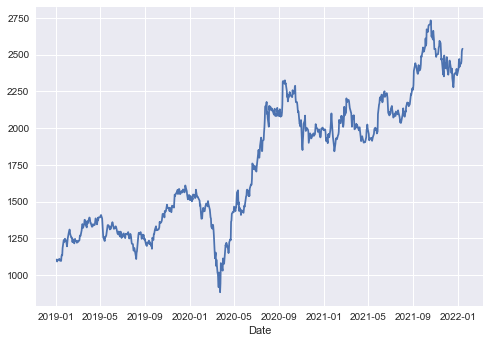

In [22]:
df['close'].plot()

In [23]:
df.info()

<class 'stockstats.StockDataFrame'>
Index: 754 entries, 2019-01-02 to 2022-01-14
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              754 non-null    object 
 1   Series              754 non-null    object 
 2   Prev Close          754 non-null    float64
 3   Open                754 non-null    float64
 4   High                754 non-null    float64
 5   Low                 754 non-null    float64
 6   Last                754 non-null    float64
 7   close               754 non-null    float64
 8   VWAP                754 non-null    float64
 9   Volume              754 non-null    int64  
 10  Turnover            754 non-null    float64
 11  Trades              754 non-null    int64  
 12  Deliverable Volume  754 non-null    int64  
 13  %Deliverble         754 non-null    float64
 14  Close_10_sma        754 non-null    float64
 15  Close_20_sma        754 non-null    float64
 16 

In [24]:
X = df.drop(['close','Series','Symbol','Volume','Turnover','Trades','Deliverable Volume'], axis=1)

In [26]:
X

,Prev Close,Open,High,Low,Last,VWAP,%Deliverble,Close_10_sma,Close_20_sma,Close_50_sma,rs_11,rsi_11,rs_14,rsi_14,rs_21,rsi_21,macd,macds,macdh
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,1121.00,1114.50,1127.00,1101.00,1104.35,1113.42,0.3560,1113.700000,1113.700000,1113.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.327564,-0.181980,-0.145584
2019-01-03,1106.40,1107.50,1114.60,1090.10,1090.30,1101.37,0.3872,1106.716667,1106.716667,1106.716667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.840667,-0.451934,-0.388733
2019-01-04,1092.75,1097.40,1104.45,1081.10,1099.60,1093.06,0.4131,1104.700000,1104.700000,1104.700000,0.241060,19.423736,0.233536,18.932238,0.224825,18.355685,-0.840417,-0.583534,-0.256883
2019-01-07,1098.65,1107.00,1118.45,1101.00,1104.90,1110.32,0.3878,1104.710000,1104.710000,1104.710000,0.515215,34.002777,0.493562,33.045951,0.468894,31.921547,-0.579855,-0.582439,0.002585
2019-01-08,1104.75,1105.10,1109.95,1096.00,1101.00,1103.82,0.4024,1104.700000,1104.700000,1104.700000,0.512681,33.892195,0.491306,32.944692,0.466932,31.830509,-0.416598,-0.537487,0.120889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,2436.00,2452.00,2457.00,2416.05,2440.20,2432.54,0.5045,2415.020000,2385.545000,2434.431000,1.226437,55.085190,1.143701,53.351707,1.054671,51.330396,2.620794,-9.463740,12.084534
2022-01-11,2438.00,2436.00,2474.95,2435.00,2455.80,2459.51,0.6347,2420.735000,2389.315000,2432.817000,1.366016,57.734853,1.242500,55.406919,1.113005,52.674040,5.705340,-6.429924,12.135264
2022-01-12,2455.55,2471.30,2524.95,2465.00,2518.00,2505.89,0.4741,2432.595000,2396.710000,2432.483000,1.939481,65.980387,1.639906,62.119861,1.341782,57.297476,13.286048,-2.486729,15.772778


<AxesSubplot:title={'center':'Correlation with Close'}>

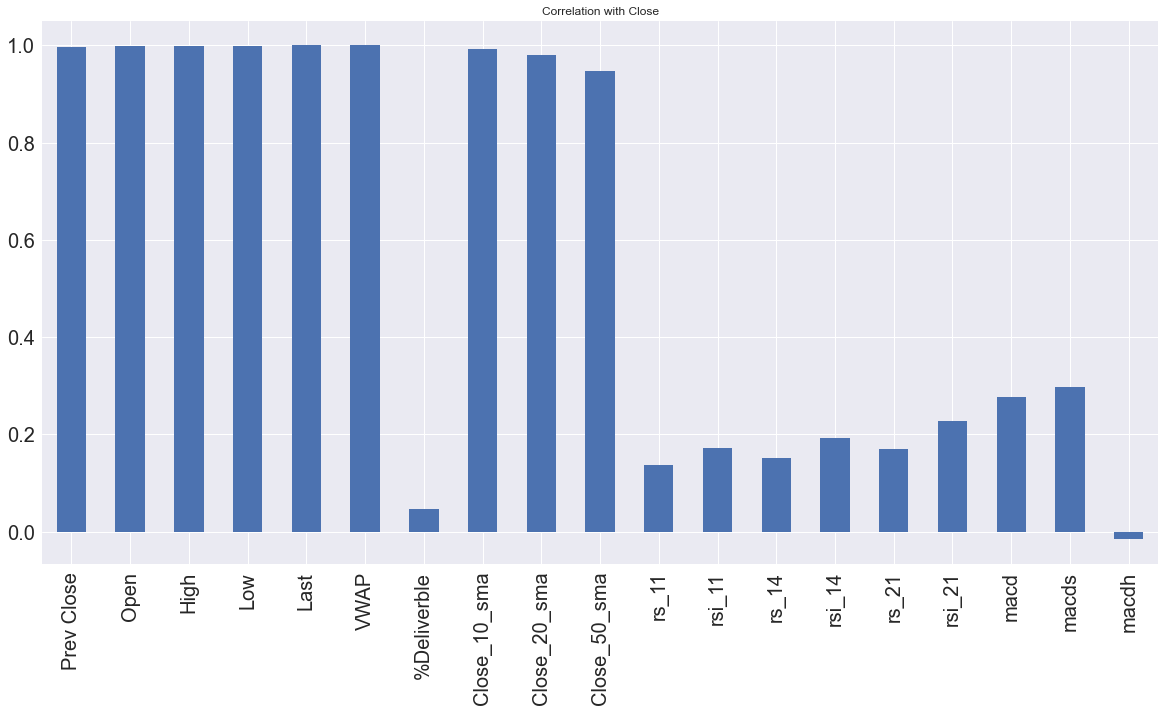

In [27]:
X.corrwith(df['close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)

In [31]:
test = df
# Target column
target_close = pd.DataFrame(test['close'])
display(target_close.head())

,close
Date,
2019-01-02,1106.40
2019-01-03,1092.75
2019-01-04,1098.65
2019-01-07,1104.75
2019-01-08,1104.65


In [32]:
print(df.index)

Index([2019-01-02, 2019-01-03, 2019-01-04, 2019-01-07, 2019-01-08, 2019-01-09,
       2019-01-10, 2019-01-11, 2019-01-14, 2019-01-15,
       ...
       2022-01-03, 2022-01-04, 2022-01-05, 2022-01-06, 2022-01-07, 2022-01-10,
       2022-01-11, 2022-01-12, 2022-01-13, 2022-01-14],
      dtype='object', name='Date', length=754)


In [33]:
# selecting Feature Columns
feature_columns = ['Prev Close', 'Open', 'High', 'Low','Last','VWAP','%Deliverble','Close_10_sma','Close_20_sma','Close_50_sma','rs_11','rsi_11','rs_14','rsi_14','rs_21','rsi_21','macd','macds','macdh']

In [34]:
target_close.shape

(754, 1)

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform

,Prev Close,Open,High,Low,Last,VWAP,%Deliverble,Close_10_sma,Close_20_sma,Close_50_sma,rs_11,rsi_11,rs_14,rsi_14,rs_21,rsi_21,macd,macds,macdh
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,-1.447654,-1.467213,-1.477164,-1.459921,-1.489570,-1.470544,-0.402823,-1.458429,-1.447085,-1.424167,-1.474196,-3.703131,-1.686947,-4.087637,-2.062102,-4.832921,-0.301714,-0.314401,-0.015421
2019-01-03,-1.480472,-1.482896,-1.504785,-1.484584,-1.521145,-1.497602,-0.130306,-1.474220,-1.462967,-1.440430,-1.474196,-3.703131,-1.686947,-4.087637,-2.062102,-4.832921,-0.314556,-0.321549,-0.036245
2019-01-04,-1.511155,-1.505524,-1.527394,-1.504948,-1.500245,-1.516262,0.095917,-1.478780,-1.467553,-1.445126,-1.225235,-2.361887,-1.399014,-2.645485,-1.706192,-3.182011,-0.314550,-0.325033,-0.024953
2019-01-07,-1.497893,-1.484016,-1.496210,-1.459921,-1.488334,-1.477505,-0.125066,-1.478757,-1.467530,-1.445103,-0.942095,-1.355178,-1.078421,-1.570381,-1.319819,-1.961898,-0.308028,-0.325004,-0.002732
2019-01-08,-1.484181,-1.488273,-1.515143,-1.471234,-1.497098,-1.492101,0.002458,-1.478780,-1.467553,-1.445126,-0.944713,-1.362813,-1.081202,-1.578094,-1.322925,-1.970086,-0.303942,-0.323814,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1.508222,1.529329,1.485402,1.515581,1.512579,1.491499,0.894251,1.484180,1.445286,1.651534,-0.207564,0.100601,-0.276845,-0.023602,-0.392504,-0.216266,-0.227922,-0.560148,1.031973
2022-01-11,1.512717,1.493483,1.525386,1.558458,1.547638,1.552059,2.031484,1.497103,1.453859,1.647775,-0.063411,0.283565,-0.155033,0.132953,-0.300158,-0.095419,-0.150721,-0.479824,1.036318
2022-01-12,1.552167,1.572569,1.636761,1.626337,1.687425,1.656204,0.628722,1.523922,1.470677,1.646997,0.528849,0.852934,0.334940,0.644307,0.062008,0.320413,0.039012,-0.375423,1.347837


In [37]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_close = target_close.shift(-1)
validation_y = target_close[-90:-1]
target_close = target_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_close.shape)
display(target_close.tail())

,Prev Close,Open,High,Low,Last,VWAP,%Deliverble,Close_10_sma,Close_20_sma,Close_50_sma,rs_11,rsi_11,rs_14,rsi_14,rs_21,rsi_21,macd,macds,macdh
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,-1.447654,-1.467213,-1.477164,-1.459921,-1.489570,-1.470544,-0.402823,-1.458429,-1.447085,-1.424167,-1.474196,-3.703131,-1.686947,-4.087637,-2.062102,-4.832921,-0.301714,-0.314401,-0.015421
2019-01-03,-1.480472,-1.482896,-1.504785,-1.484584,-1.521145,-1.497602,-0.130306,-1.474220,-1.462967,-1.440430,-1.474196,-3.703131,-1.686947,-4.087637,-2.062102,-4.832921,-0.314556,-0.321549,-0.036245
2019-01-04,-1.511155,-1.505524,-1.527394,-1.504948,-1.500245,-1.516262,0.095917,-1.478780,-1.467553,-1.445126,-1.225235,-2.361887,-1.399014,-2.645485,-1.706192,-3.182011,-0.314550,-0.325033,-0.024953
2019-01-07,-1.497893,-1.484016,-1.496210,-1.459921,-1.488334,-1.477505,-0.125066,-1.478757,-1.467530,-1.445103,-0.942095,-1.355178,-1.078421,-1.570381,-1.319819,-1.961898,-0.308028,-0.325004,-0.002732
2019-01-08,-1.484181,-1.488273,-1.515143,-1.471234,-1.497098,-1.492101,0.002458,-1.478780,-1.467553,-1.445126,-0.944713,-1.362813,-1.081202,-1.578094,-1.322925,-1.970086,-0.303942,-0.323814,0.007400


Shape of features :  (754, 19)
Shape of target :  (754, 1)


,Prev Close,Open,High,Low,Last,VWAP,%Deliverble,Close_10_sma,Close_20_sma,Close_50_sma,rs_11,rsi_11,rs_14,rsi_14,rs_21,rsi_21,macd,macds,macdh
Date,,,,,,,,,,,,,,,,,,,
2022-01-07,1.464389,1.482168,1.487741,1.505399,1.511905,1.500907,1.312634,1.468860,1.442062,1.659014,-0.222498,0.080326,-0.289735,-0.041017,-0.402527,-0.229796,-0.282689,-0.640136,1.103305
2022-01-10,1.508222,1.529329,1.485402,1.515581,1.512579,1.491499,0.894251,1.484180,1.445286,1.651534,-0.207564,0.100601,-0.276845,-0.023602,-0.392504,-0.216266,-0.227922,-0.560148,1.031973
2022-01-11,1.512717,1.493483,1.525386,1.558458,1.547638,1.552059,2.031484,1.497103,1.453859,1.647775,-0.063411,0.283565,-0.155033,0.132953,-0.300158,-0.095419,-0.150721,-0.479824,1.036318
2022-01-12,1.552167,1.572569,1.636761,1.626337,1.687425,1.656204,0.628722,1.523922,1.470677,1.646997,0.528849,0.852934,0.334940,0.644307,0.062008,0.320413,0.039012,-0.375423,1.347837
2022-01-13,1.699511,1.684477,1.672512,1.724537,1.728439,1.700350,1.461120,1.563765,1.485618,1.648604,0.669979,0.957290,0.449247,0.742206,0.144386,0.403903,0.212224,-0.255255,1.551830


,close
Date,
2022-01-07,2438.00
2022-01-10,2455.55
2022-01-11,2521.10
2022-01-12,2535.30
2022-01-13,2539.00



 -----After process------ 

Shape of features :  (664, 19)
Shape of target :  (664, 1)


,close
Date,
2021-08-31,2267.1
2021-09-01,2294.4
2021-09-02,2388.5
2021-09-03,2425.6
2021-09-06,2440.9


In [38]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_close[:len(train_index)].values.ravel(), target_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [39]:
X_train.shape, y_train.shape

((604, 19), (604,))

In [61]:
X_train.shape[1]

19

In [40]:
X_test.shape, y_test.shape

((60, 19), (60,))

In [41]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  249.24516719645047
R2 score:  -4.743316913565516


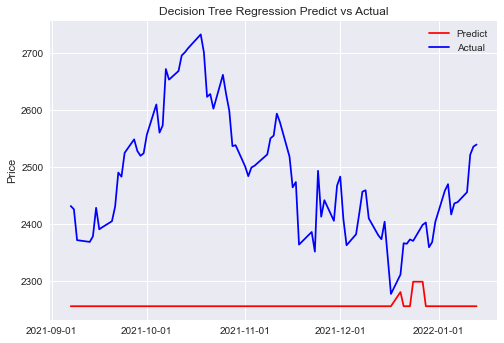

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [43]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [81]:
X_train.shape[1]

19

In [45]:
X_tr_t.shape

(604, 1, 19)

In [69]:
X_tr_t.shape[2]

19

In [46]:
X_tst_t.shape

(60, 1, 19)

In [50]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM, Bidirectional
K.clear_session()
#model_lstm = Sequential()
#model_lstm.add(LSTM(50, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=True))
#model_lstm.add(LSTM(50, activation='relu'))
#model_lstm.add(LSTM(50))
#model_lstm.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, X_train.shape[1])))
#model_lstm.add(Dense(1))
#model_lstm.compile(loss='mean_squared_error', optimizer='adam')

model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=True))
model_lstm.add(LSTM(32, activation='relu', return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=500, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/500
76/76 [==============================] - 3s 2ms/step - loss: 2769923.2500
Epoch 2/500
76/76 [==============================] - 0s 2ms/step - loss: 2759021.5000
Epoch 3/500
76/76 [==============================] - 0s 2ms/step - loss: 2647911.7500
Epoch 4/500
76/76 [==============================] - 0s 2ms/step - loss: 2314578.7500
Epoch 5/500
76/76 [==============================] - 0s 2ms/step - loss: 1799799.5000
Epoch 6/500
76/76 [==============================] - 0s 2ms/step - loss: 1352946.3750
Epoch 7/500
76/76 [==============================] - 0s 2ms/step - loss: 1043787.2500
Epoch 8/500
76/76 [==============================] - 0s 2ms/step - loss: 833339.3125
Epoch 9/500
76/76 [==============================] - 0s 2ms/step - loss: 645728.6250
Epoch 10/500
76/76 [==============================] - 0s 2ms/step - loss: 469406.6875
Epoch 11/500
76/76 [==============================] - 0s 2ms/step - loss: 372692.8438
Epoch 12/500
76/76 [==============================] - 0s

76/76 [==============================] - 0s 2ms/step - loss: 66961.7031
Epoch 96/500
76/76 [==============================] - 0s 2ms/step - loss: 67657.2344
Epoch 97/500
76/76 [==============================] - 0s 2ms/step - loss: 64004.0273
Epoch 98/500
76/76 [==============================] - 0s 2ms/step - loss: 68851.4453
Epoch 99/500
76/76 [==============================] - 0s 2ms/step - loss: 71944.0859
Epoch 100/500
76/76 [==============================] - 0s 3ms/step - loss: 67258.1797
Epoch 101/500
76/76 [==============================] - 0s 2ms/step - loss: 61469.4375
Epoch 102/500
76/76 [==============================] - 0s 2ms/step - loss: 64932.5820
Epoch 103/500
76/76 [==============================] - 0s 2ms/step - loss: 63296.0312
Epoch 104/500
76/76 [==============================] - 0s 2ms/step - loss: 62192.5234
Epoch 105/500
76/76 [==============================] - 0s 2ms/step - loss: 64278.3711
Epoch 106/500
76/76 [==============================] - 0s 2ms/step - los

76/76 [==============================] - 0s 3ms/step - loss: 50009.0156
Epoch 191/500
76/76 [==============================] - 0s 2ms/step - loss: 46190.3125
Epoch 192/500
76/76 [==============================] - 0s 2ms/step - loss: 49375.2891
Epoch 193/500
76/76 [==============================] - 0s 2ms/step - loss: 49968.9648
Epoch 194/500
76/76 [==============================] - 0s 2ms/step - loss: 48869.8164
Epoch 195/500
76/76 [==============================] - 0s 2ms/step - loss: 45933.1367
Epoch 196/500
76/76 [==============================] - 0s 2ms/step - loss: 48593.3477
Epoch 197/500
76/76 [==============================] - 0s 2ms/step - loss: 44778.6406
Epoch 198/500
76/76 [==============================] - 0s 2ms/step - loss: 45059.1094
Epoch 199/500
76/76 [==============================] - 0s 2ms/step - loss: 43406.5117
Epoch 200/500
76/76 [==============================] - 0s 2ms/step - loss: 43420.0859
Epoch 201/500
76/76 [==============================] - 0s 2ms/step -

In [51]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


The R2 score on the Train set is:	0.978
The R2 score on the Test set is:	0.591


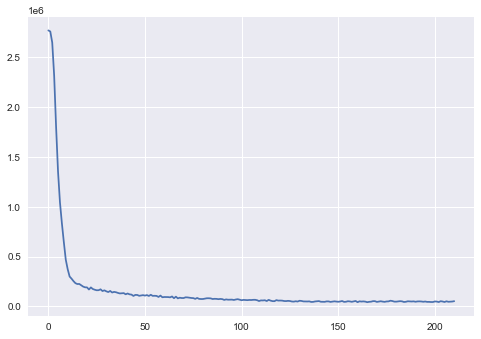

In [52]:
loss = history_model_lstm.history['loss']
plt.plot(loss)

In [53]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

60/60 [==============================] - 1s 839us/step - loss: 3226.8015


In [54]:
print('LSTM: %f'%score_lstm)

LSTM: 3226.801514


In [55]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

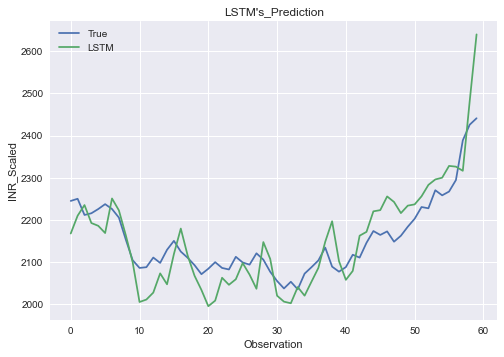

In [56]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [57]:
type(y_pred_test_LSTM)

numpy.ndarray

In [79]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 1
n_days_for_prediction=7  #let us predict past 15 days

In [80]:
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
predict_period_dates

[Timestamp('2022-01-14 00:00:00', freq='C'),
 Timestamp('2022-01-18 00:00:00', freq='C'),
 Timestamp('2022-01-19 00:00:00', freq='C'),
 Timestamp('2022-01-20 00:00:00', freq='C'),
 Timestamp('2022-01-21 00:00:00', freq='C'),
 Timestamp('2022-01-24 00:00:00', freq='C'),
 Timestamp('2022-01-25 00:00:00', freq='C')]

In [77]:
#Make prediction
prediction = model_lstm.predict(X_tr_t[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

In [88]:
prediction

array([[2210.762 ],
       [2259.6946],
       [2214.2412],
       [2230.0305],
       [2203.698 ],
       [2164.1562],
       [2169.6077]], dtype=float32)

In [99]:
prediction_copies = np.repeat(prediction, X_tr_t.shape[2], axis=-1)
print(prediction_copies)[[0]]

[[2210.762  2210.762  2210.762  2210.762  2210.762  2210.762  2210.762
  2210.762  2210.762  2210.762  2210.762  2210.762  2210.762  2210.762
  2210.762  2210.762  2210.762  2210.762  2210.762 ]
 [2259.6946 2259.6946 2259.6946 2259.6946 2259.6946 2259.6946 2259.6946
  2259.6946 2259.6946 2259.6946 2259.6946 2259.6946 2259.6946 2259.6946
  2259.6946 2259.6946 2259.6946 2259.6946 2259.6946]
 [2214.2412 2214.2412 2214.2412 2214.2412 2214.2412 2214.2412 2214.2412
  2214.2412 2214.2412 2214.2412 2214.2412 2214.2412 2214.2412 2214.2412
  2214.2412 2214.2412 2214.2412 2214.2412 2214.2412]
 [2230.0305 2230.0305 2230.0305 2230.0305 2230.0305 2230.0305 2230.0305
  2230.0305 2230.0305 2230.0305 2230.0305 2230.0305 2230.0305 2230.0305
  2230.0305 2230.0305 2230.0305 2230.0305 2230.0305]
 [2203.698  2203.698  2203.698  2203.698  2203.698  2203.698  2203.698
  2203.698  2203.698  2203.698  2203.698  2203.698  2203.698  2203.698
  2203.698  2203.698  2203.698  2203.698  2203.698 ]
 [2164.1562 2164.15

TypeError: 'NoneType' object is not subscriptable

In [104]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:0]
print(y_pred_future)

[[9.85281312e+05 9.88538062e+05 9.94278625e+05 9.78812562e+05
  9.85478000e+05 9.86311875e+05 2.53508850e+02 9.79431500e+05
  9.73875062e+05 9.51044500e+05 2.14203369e+03 3.20696172e+04
  1.79446619e+03 2.90760293e+04 1.39782214e+03 2.46341465e+04
  8.83421641e+04 8.35114688e+04 2.58144512e+04]
 [1.00705031e+06 1.01037900e+06 1.01624619e+06 1.00043875e+06
  1.00725125e+06 1.00810362e+06 2.59111084e+02 1.00107112e+06
  9.95391938e+05 9.72056562e+05 2.18941357e+03 3.27782539e+04
  1.83415430e+03 2.97184043e+04 1.42873242e+03 2.51782051e+04
  9.02972500e+04 8.53596406e+04 2.63858223e+04]
 [9.86829188e+05 9.90091000e+05 9.95840562e+05 9.80350250e+05
  9.87026125e+05 9.87861312e+05 2.53907181e+02 9.80970125e+05
  9.75405000e+05 9.52538500e+05 2.14540259e+03 3.21200039e+04
  1.79728821e+03 2.91217031e+04 1.40001990e+03 2.46728301e+04
  8.84811719e+04 8.36428828e+04 2.58550762e+04]
 [9.93853500e+05 9.97138500e+05 1.00292894e+06 9.87328438e+05
  9.94051812e+05 9.94893000e+05 2.55714874e+02 9.8

In [64]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date()) 


In [67]:
forecast_dates 

[datetime.date(2022, 1, 14),
 datetime.date(2022, 1, 18),
 datetime.date(2022, 1, 19),
 datetime.date(2022, 1, 20),
 datetime.date(2022, 1, 21),
 datetime.date(2022, 1, 24),
 datetime.date(2022, 1, 25)]

In [73]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'close':prediction})
df_forecast['Date']=pd.to_datetime(df_forecast['close'])

ValueError: Data must be 1-dimensional

In [66]:
df_forecast

,Date,close
0,1970-01-01 00:00:00.000985281,9.852813e+05
1,1970-01-01 00:00:00.001007050,1.007050e+06
2,1970-01-01 00:00:00.000986829,9.868292e+05
3,1970-01-01 00:00:00.000993853,9.938535e+05
4,1970-01-01 00:00:00.000982138,9.821388e+05
5,1970-01-01 00:00:00.000964547,9.645476e+05
6,1970-01-01 00:00:00.000966972,9.669728e+05
